# __Concert Model__

In this project, we will analyze a problem faced by concert producers, which is maximizing profits. Concerts have become a major source of income for many musicians, but they also involve significant costs and risks for producers. Therefore, it is crucial for producers to carefully manage their resources and make informed decisions about which concerts to produce and how to price tickets. To address this problem, we will apply numerical model analysis methods such as optimization and equation solving.

### Model Equations

The **hype** score function, based on the number of performances per year, is represented as:
$hype(performances) = 1 - 0.25 \times performances$

The **visibility** score function, based on the number of performances per year, is represented as:
$visibility(performances) = 0.25 \times performances$

The **popularity** score function, which is based on both the hype and visibility scores, is represented as:
$popularity(performances) = (hype(performances))^{0.5} \times (visibility(performances))^{0.8}$

The **demand** function, which calculates the demand based on the ticket price and the number of performances per year, can be represented as:
$demand(price, performances) = 20 \times (35 - price) \times popularity(performances)$

The **revenue** function calculates the revenue based on the ticket price, the number of performances per year, and the number of seats. Here, the quantity sold is capped at the number of seats available. This is represented as:
$revenue(price, performances, seats) = price \times \min(seats, demand(price, performances))$

The **venue cost** function calculates the cost of the venue based on the number of seats in that venue. This is represented as: $venue\_cost(seats) = a \times seats^b + c$, where $a$, $b$, and $c$ are coefficients we estimate using real-world data.

The **profit** function calculates the profit when the venue size exactly matches demand. It is computed by subtracting the venue cost function's output from the revenue function's output, and can be represented as:
$profit(price, performances) = revenue(price, performances) - venue\_cost(demand(price, performances))$

The **profit_in_venue** function calculates the profit when the venue size is fixed. Similar to the **profit** function, it is calculated by subtracting the venue cost from the revenue, and can be represented as:
$profit\_in\_venue(price, performances, seats) = revenue(price, performances, seats) - venue\_cost(seats)$



### Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

%load_ext autoreload
%autoreload 2

from project_functions import *

<br>

### Parametric Framework

The profit maximisation model for a producer relies heavily upon certain aspects regarding the musician or band, which we have broadly classified into three parameters which we will be using in our analysis - Hype, Visibility and Popularity. To quantify these inherently uncountable determinants, we will create metrics relative to the number of performances per year. 
To define the direction of causality; we make use the amount of time since last performance as a positive function of hype whilst simultaneously using it as a negative function of visibility and finally use both hype as well as visibility to quantify popularity.By incorporating these metrics into our analysis, we aim to provide a comprehensive evaluation of the potential profitability of producing a concert, and to identify factors that can be optimized to maximize profits. 

<br>

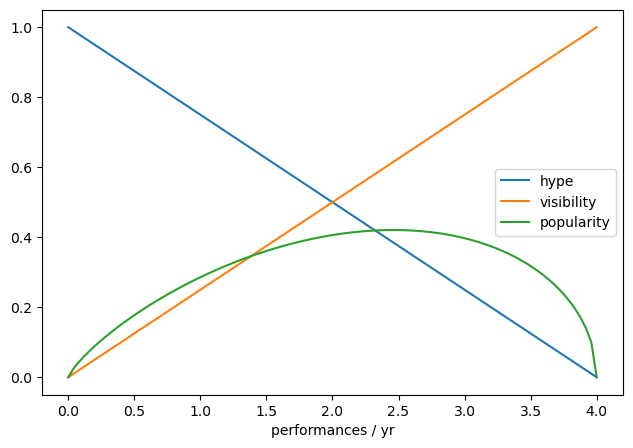

In [2]:
# Create a figure with a subplot
ax = plt.figure(figsize=(7.5,5)).add_subplot()

# Generate a range of values for the x-axis
xs = np.linspace(0,4,100)

# Plot the hype, visibility, and popularity curves
ax.plot(xs, hype(xs), label='hype')
ax.plot(xs, visibility(xs), label='visibility')
ax.plot(xs, popularity(xs), label='popularity')

# Set the label for the x-axis and add a legend
ax.set(xlabel='performances / yr')
ax.legend()

<br>

### Demand and Revenue

<br>The demand and revenue functions plot the expected demand and revenue generated by a concert producer at different price points and performance frequencies. These metrics are crucial for any concert producer looking to maximize their profits and optimize their pricing and performance strategies. By analyzing these functions, the music business can gain insight into the preferences and behaviors of their audience and make data-driven decisions to increase their profitability and competitiveness in the market.

The follwoing graphical illustration assumes an infinite number of venues, thereby making it globally applicable and easy to use. A producer can very simply make their decision by reading the graph against their own demand data.

[Text(0.5, 0.92, 'revenue'),
 Text(0.5, 0, 'price'),
 Text(0.5, 0.5, 'performances / yr'),
 Text(0.5, 0, 'revenue')]

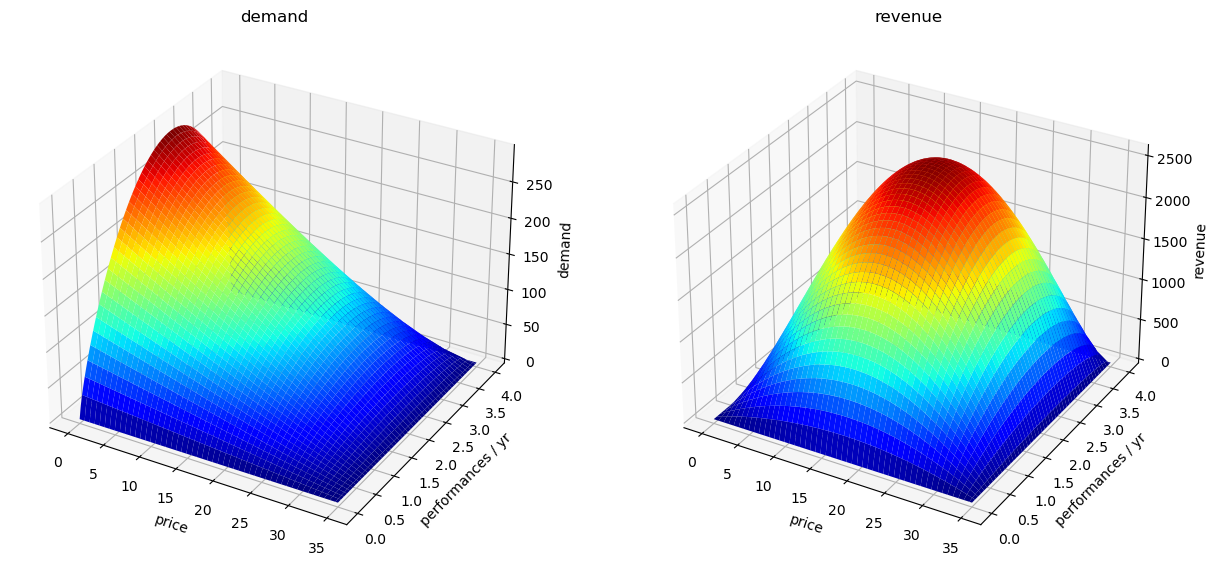

In [3]:
# Create subplots for demand and revenue as a function of price and performances per year
fig, axs = plt.subplots(1, 2, figsize=(15,7.5), subplot_kw={'projection':'3d'})

# Plot demand as a function of price and performances
plot3D(demand, np.linspace(0,35,100), np.linspace(0,4,100), ax=axs[0]).set(title='demand', xlabel='price', ylabel='performances / yr', zlabel='demand')

# Plot revenue as a function of price and performances
plot3D(revenue, np.linspace(0,35,100), np.linspace(0,4,100), ax=axs[1]).set(title='revenue', xlabel='price', ylabel='performances / yr', zlabel='revenue')

<br>

### Costs and Profit

This code creates a plot of the venue cost as a function of the number of seats. It is an important metric to consider when planning concerts as it directly affects the profitability of the event. As the number of seats increases, so does the cost of the venue, and the profit margin is affected. By analyzing this cost, concert producers can make informed decisions about the size of the venue and the ticket prices to maximize profits. For simplicity as well as clarity, we model the relationship between the number of seats and venue cost with no other dependencies.

We therefore define the functional form of the venue cost function to be:

$venue\_cost(seats) = a \times seats^b + c$

We now estimate these parameters using real-world costs and capacities from small venues in the city of Glasgow, Scotland.

In [45]:
venues = [
    {'name': 'Old Hairdressers', 'seats': 50, 'cost' : 100},
    {'name': 'Hug and Pint', 'seats': 100, 'cost' : 200},
    {'name': 'Cabaret Voltaire', 'seats': 130, 'cost': 300},
    {'name': 'Mash House', 'seats': 250, 'cost': 350},
    {'name': 'Stereo', 'seats': 500, 'cost': 700}
]

In [46]:
venue_cost = estimate_venue_cost_fn(venues)

Difference with data minimized with:
 a = 3.598, b = 0.839, c = 27.294


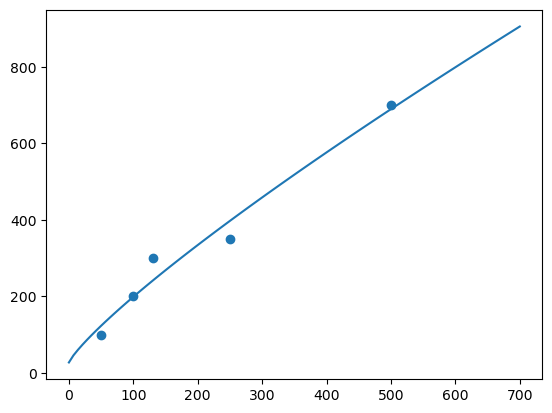

In [48]:
xs = np.linspace(0, 700, 100)
ys = venue_cost(xs)

fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.scatter([venue['seats'] for venue in venues], [venue['cost'] for venue in venues])

<br>This code creates a 3D plot of the profit function based on the price and number of performances per year. The x-axis represents the price of tickets, the y-axis represents the number of performances per year, and the z-axis represents the profit. This plot is useful for visualizing the relationship between price, performances, and profit, and can be used to identify the optimal price and number of performances to maximize profit for the concert producer.

[Text(0.5, 0.92, 'profit'),
 Text(0.5, 0, 'price'),
 Text(0.5, 0.5, 'performances / yr'),
 Text(0.5, 0, 'profit'),
 (0.0, 2500.0)]

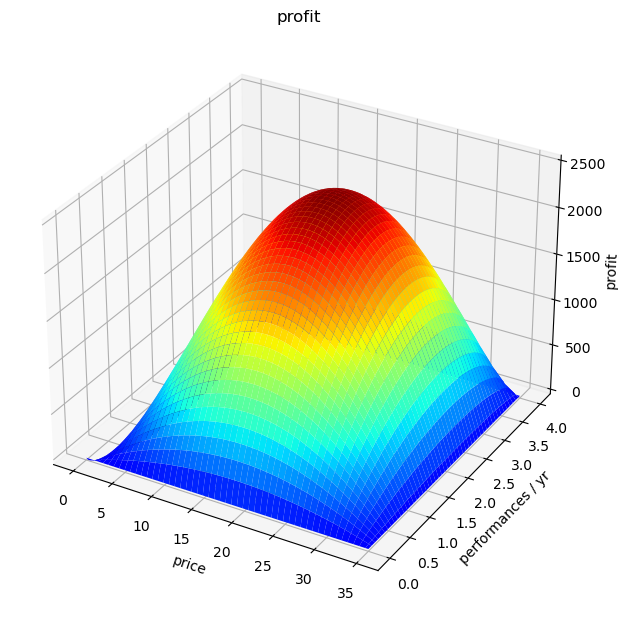

In [49]:
#Create a 3D plot of profit with respect to price and performances per year
ax = plt.figure(figsize=(7.5,7.5)).add_subplot(projection='3d')
plot3D(profit, np.linspace(0, 35, 100), np.linspace(0,4,100), ax=ax)
#Set the title and axis labels for the plot
ax.set(title='profit', xlabel='price', ylabel='performances / yr', zlabel='profit', zlim=(0,2500))

<br>

### Limited venues

Here, we are examining the effect of limiting the number of seats in a venue on profit. We define a list of potential venue sizes, and then create a 3D plot for each size, showing how profit varies with price and number of performances. Each plot represents the profit function with a fixed venue size, allowing us to compare the profitability of different venues. This analysis is important for concert producers as it allows them to make informed decisions about venue size and pricing strategies to maximize profits. From our analysis, we visibly conclude that here the venue with a 250 seating capacity maximises the profit for the producer.

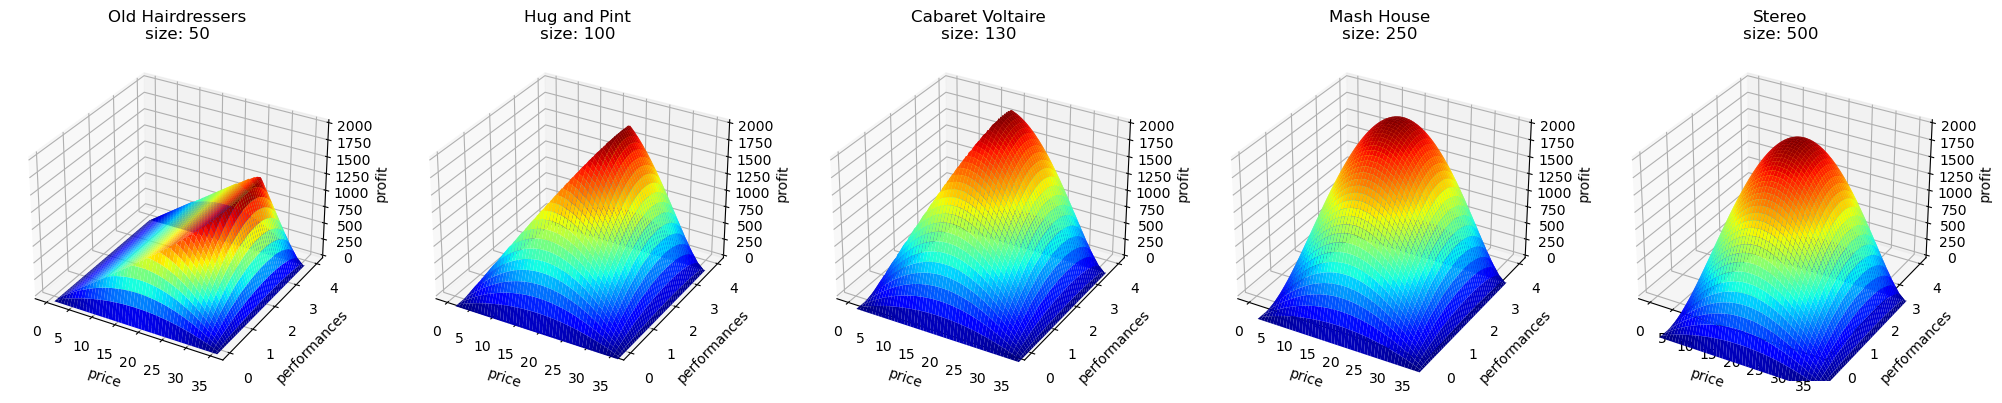

In [50]:
#Create a 4x1 subplots figure with 3D projection
fig, axs = plt.subplots(1, len(venues), figsize=(25,7.5), subplot_kw={'projection':'3d'})
#Iterate through the venues list and set profit_in_venue as the function to be plotted
for i, venue in enumerate(venues):
    seats = venue['seats']
    ax = plot3D(profit_in_venue, np.linspace(0,35,100), np.linspace(0,4,100), seats, ax=axs[i])
    # Set the title, labels, and z-limit for the subplot
    ax.set(title=venue['name'] + '\nsize: '+str(seats), xlabel='price', ylabel='performances', zlabel='profit', zlim=(0,2000))  

Thus, given some venue size and number of previous performances, we can calculate the price which maximises profit.

In [51]:
def obj(x, performances, seats):
    return -profit_in_venue(x, performances, seats)

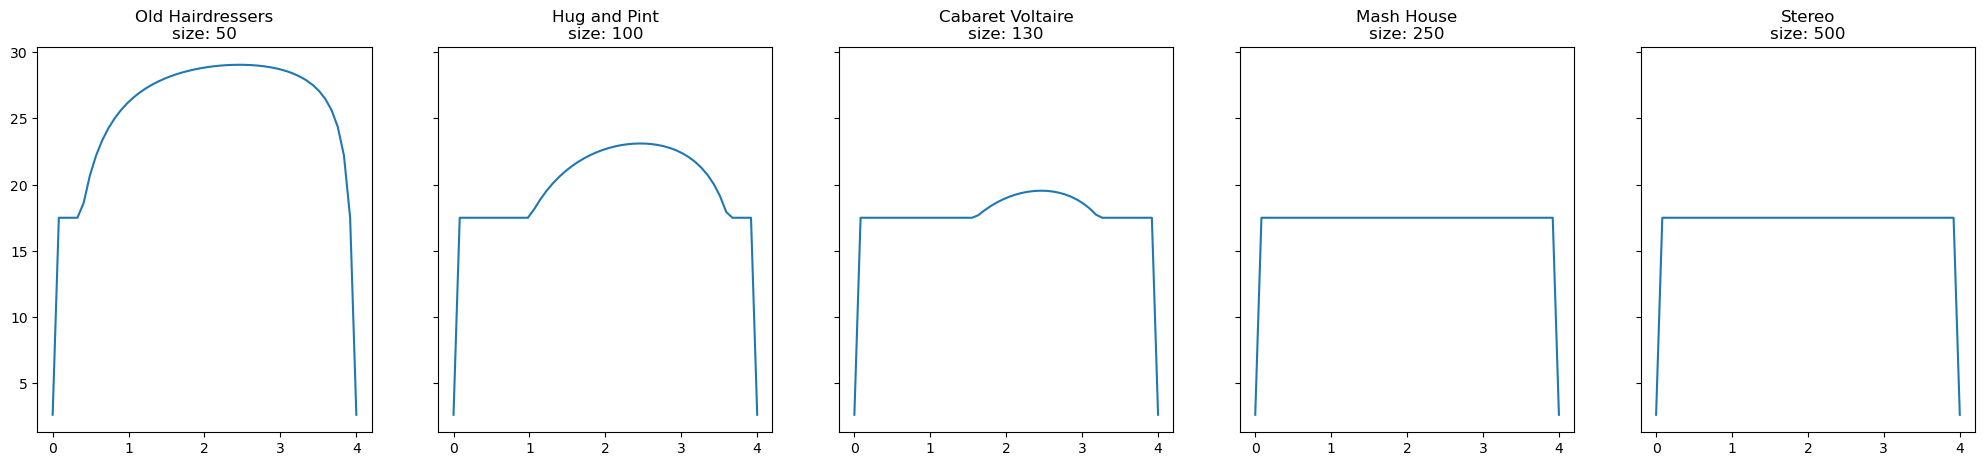

In [52]:
fig, axs = plt.subplots(1, len(venues), figsize=(25, 5), sharey=True)

for i, venue in enumerate(venues):
    xs =np.linspace(0,4,50) 
    ys = []
    for performances in xs:
        res = optimize.minimize_scalar(obj, args=(performances, venue['seats']), method='Brent')
        ys.append(res.x)
    
    axs[i].plot(xs, ys)
    axs[i].set(title=venue['name']+'\nsize: '+str(venue['seats']))


This shows that when profit is constrained by seat availability and demand is high, producers can raise prices to maximise profit. However, when venues provide more seats than will ever be required by demand (and especially for low levels of demand), the profit-maximising price is that constant value ($\approx 17.5$) which maximises revenue.